### Welcome to the exercise about observational studies! This exercise will be hands on, and you will be able to practise the skills you developed so far!

## Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 6 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to deepen your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

data_folder = './data/'
df = pd.read_csv(data_folder + 'lalonde.csv')

In [4]:
df.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
43,NSW44,1,18,8,0,1,1,1,0.000,0.000,2787.9600
310,PSID126,0,27,12,0,0,1,0,4043.927,3231.532,7240.8600
164,NSW165,1,29,12,1,0,0,0,9748.387,4878.937,10976.5100
579,PSID395,0,53,12,0,0,0,0,0.000,0.000,0.0000
601,PSID417,0,16,8,0,1,0,1,0.000,0.000,12242.9600
452,PSID268,0,16,9,1,0,0,1,0.000,277.500,3983.9510
135,NSW136,1,31,9,1,0,0,1,0.000,1698.607,10363.2700
612,PSID428,0,32,5,1,0,1,1,0.000,0.000,187.6713
50,NSW51,1,28,8,1,0,0,1,0.000,0.000,0.0000
88,NSW89,1,21,12,0,0,0,0,0.000,0.000,8048.6030


## 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lecture 4 ("Descibing data") and 3 ("Visualizing data").

What might a naive "researcher" conclude from this superficial analysis?

In [79]:
''' your code and explanations '''
# Separate the two groups based on treat (1 or 0)
treat_group = df.loc[df['treat'] == 1]
control_group = df.loc[df['treat'] == 0]

#treat_group.sample(10)
#control_group.sample(10)

In [7]:
treat_group[['re78']].describe()

,re78
count,185.000000
mean,6349.143530
std,7867.402218
min,0.000000
25%,485.229800
50%,4232.309000
75%,9642.999000
max,60307.930000


In [87]:
control_group[['re78']].describe()

,re78
count,429.000000
mean,6984.169742
std,7294.161791
min,0.000000
25%,220.181300
50%,4975.505000
75%,11688.820000
max,25564.670000


/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1296x864 with 0 Axes>

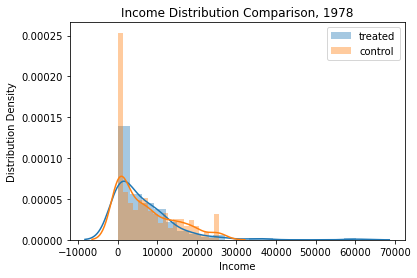

<Figure size 1296x864 with 0 Axes>

In [91]:
# Plot the re78 distribution of treat_group and control_group, using distplot of seaborn
ax1 = sns.distplot(treat_group['re78'], bins=20, hist=True, kde=True, label='treated')
ax1 = sns.distplot(control_group['re78'], bins=20, hist=True, kde=True, label='control')
ax1.set_title('Income Distribution Comparison, 1978')
ax1.set(xlabel='Income', ylabel='Distribution Density')
plt.legend()
plt.figure(figsize = (18, 12))

A "naive" researcher may conclude the following:
* The treated group has
1. a lower mean earning value
2. a higher first percentile value: a higher low income interval
3. some outliers with very high income values, close or equal to maximum

* The control group has
1. a higher mean earning value
2. a lower first percentile value: a lower low income interval
3. more concentrated income distributed at interval (11250, 25000) approximately

## 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

'\nFrom the pairplots, we notice that the distribution of other factors in the treat / control group is different,\nthis reveals that these factors may actually contribute to the result showed in "superficial" income analysis.\nNow we will take detailed analysis between \'treat\' and one other factor to find less naive income patterns.\n'

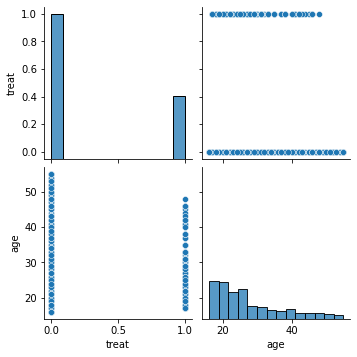

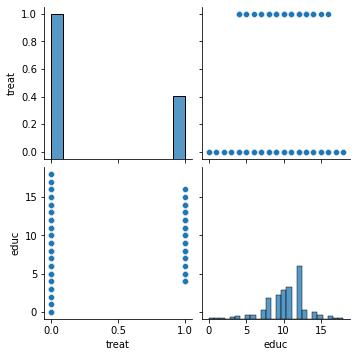

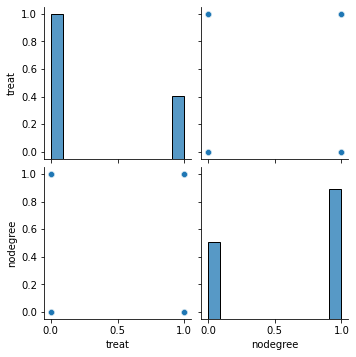

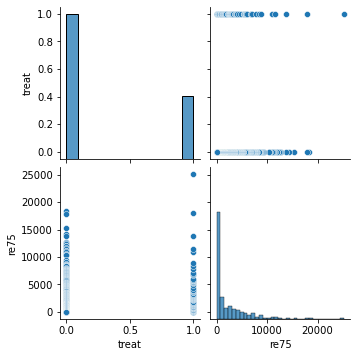

In [17]:
''' your code and explanations '''
# Firstly we build a complete pair plot pattern between some columns
"""
From the pairplots, we notice that the distribution of other factors in the treat / control group is different,
this reveals that these factors may actually contribute to the result showed in "superficial" income analysis.
Now we will take detailed analysis between 'treat' and one other factor to find less naive income patterns.
"""

sns.pairplot(df[['treat', 'age']])
sns.pairplot(df[['treat', 'educ']])
sns.pairplot(df[['treat', 'nodegree']])
sns.pairplot(df[['treat', 're75']])

'\nAlthough the median age values between the treat and control group are nearly identical, but the boxplot reveals that\npeople who joined the training program tend to be younger that those who did not (excluding the outliers).\n'

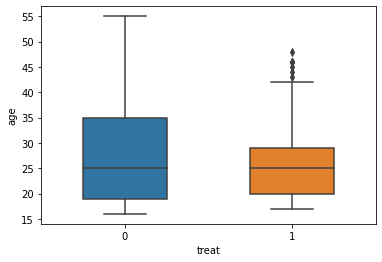

In [20]:
# treat & age: we use boxplot to find the distribution of age in the treat/control group
"""
Although the median age values between the treat and control group are nearly identical, but the boxplot reveals that
people who joined the training program tend to be younger that those who did not (excluding the outliers).
"""
sns.boxplot(x='treat', y='age', data=df, width=0.5)

'\nExcluding the outliers for both groups, people in treat / control group have nearly identical distribution on their years\nof education, in this case we will move on to other factors.\n'

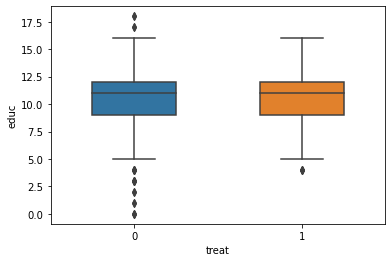

In [26]:
# treat & educ
"""
Excluding the outliers for both groups, people in treat / control group have nearly identical distribution on their years
of education, in this case we will move on to other factors.
"""
sns.boxplot(x='treat', y='educ', data=df, width=0.5)

In [52]:
# treat & nodegree
# We calculate the percentage of people who does not have a degree in the two groups separately
"""
The treat group has a relatively higher percentage of people who do not have a degree, this may also affect the
income distribution.
"""

treat_degree = df.groupby(['treat', 'nodegree'])['nodegree'].count().unstack()
treat_degree = treat_degree.div(treat_degree.sum(axis=1), axis=0)
treat_degree = treat_degree.applymap(lambda x: '{0:.2f}%'.format(x * 100))
treat_degree

nodegree,0,1
treat,,
0,40.33%,59.67%
1,29.19%,70.81%


In [69]:
# treat and married
"""
The treat group has a lower percentage of people who are married, age and marriage may indicate what kind of people
joined the training program.
"""

treat_married = df.groupby(['treat', 'married'])['married'].count().unstack()
treat_married = treat_married.div(treat_married.sum(axis=1), axis=0)
treat_married_per = treat_married.applymap(lambda x: '{0:.2f}%'.format(x * 100))
treat_married_per

married,0,1
treat,,
0,48.72%,51.28%
1,81.08%,18.92%


Text(0, 0.5, 'Proportion of Group Members')

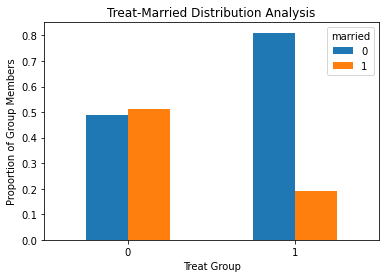

In [73]:
# Plot the distribution histogram for treat and married
treat_married.plot(kind='bar', rot=0)
plt.title('Treat-Married Distribution Analysis')
plt.xlabel('Treat Group')
plt.ylabel('Proportion of Group Members')

In [76]:
# treat and race
# We add a new column of 'white' indicating those who are not 'black' or 'hispan'
"""
In the treat group, black people comprise the major part, of about 84.32%; whereas in the control group, white people
comprise the major part, of about 65.5%. Race composition may leading to bias in income distribution.
"""

df['white'] = (~(df['black'].astype(bool) | df['hispan'].astype(bool))).astype(int)
df.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
318,PSID134,0,19,11,1,0,0,1,5607.4220,3054.290,94.5745,0
18,NSW19,1,40,12,1,0,0,0,0.0000,0.000,10804.3200,0
280,PSID96,0,47,10,1,0,0,1,21918.3200,4323.629,19438.0200,0
231,PSID47,0,19,11,0,0,1,1,4306.4680,6978.677,837.8710,1
375,PSID191,0,18,12,1,0,0,0,1579.1690,1408.984,3057.4160,0
544,PSID360,0,55,6,0,0,1,1,111.6782,0.000,0.0000,1
373,PSID189,0,26,12,1,0,0,0,0.0000,1448.371,0.0000,0
35,NSW36,1,42,14,1,0,0,0,0.0000,0.000,20505.9300,0
312,PSID128,0,24,7,0,0,1,1,7860.5780,3213.629,0.0000,1
132,NSW133,1,26,11,1,0,1,1,0.0000,1392.853,1460.3600,0


In [72]:
# Analyze the race distribution of the treat/control group
treat_race = df.groupby(['treat'])[['black','hispan','white']].sum()
#treat_race = treat_race.sum(axis=1)
treat_race = treat_race.div(treat_race.sum(axis=1), axis=0)
treat_race_per = treat_race.applymap(lambda x: '{0:.2f}%'.format(x * 100))
treat_race_per

,black,hispan,white
treat,,,
0,20.28%,14.22%,65.50%
1,84.32%,5.95%,9.73%


Text(0, 0.5, 'Proportion of Races')

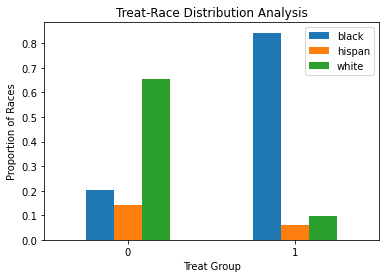

In [75]:
treat_race.plot(kind='bar', rot=0)
plt.title('Treat-Race Distribution Analysis')
plt.xlabel('Treat Group')
plt.ylabel('Proportion of Races')

/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


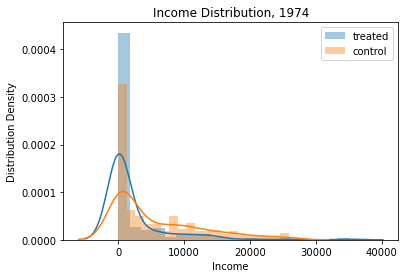

In [92]:
# treat and former income 're74' / 're75'
"""
The income distribution in 1974 and 1975 reveals that the treat group has a higher proportion of people who do not have
income before the training program, some of them may be workplace newcomers. Work experience is indeed an important factor
when it comes to income levels.
"""

# re74
ax2 = sns.distplot(treat_group['re74'], bins=20, hist=True, kde=True, label='treated')
ax2 = sns.distplot(control_group['re74'], bins=20, hist=True, kde=True, label='control')
ax2.set_title('Income Distribution, 1974')
plt.xlabel('Income')
plt.ylabel('Distribution Density')
plt.legend()
plt.show()

/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


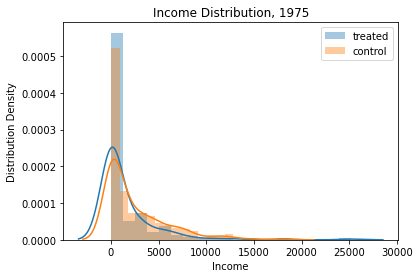

In [93]:
ax2 = sns.distplot(treat_group['re75'], bins=20, hist=True, kde=True, label='treated')
ax2 = sns.distplot(control_group['re75'], bins=20, hist=True, kde=True, label='control')
ax2.set_title('Income Distribution, 1975')
plt.xlabel('Income')
plt.ylabel('Distribution Density')
plt.legend()
plt.show()

## 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `statsmodels` to fit the logistic regression model and apply it to each data point to obtain propensity scores.

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144483/pdf/hmbr46-399.pdf).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3144483/pdf/hmbr46-399.pdf).)

In [94]:
''' your code and explanations '''
# Firstly, we standardize the age, educ, re74, and re75 as continuous features
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['educ'] = (df['educ'] - df['educ'].mean()) / df['educ'].std()
df['re74'] = (df['re74'] - df['re74'].mean()) / df['re74'].std()
df['re75'] = (df['re75'] - df['re75'].mean()) / df['re75'].std()
df.sample(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,white
291,PSID107,0,-0.846375,0.658697,0,0,1,0,0.194431,0.526167,1066.9190,1
180,NSW181,1,0.570459,0.658697,1,0,1,0,2.427059,2.656937,15952.6000,0
273,PSID89,0,-1.149982,-0.482714,0,0,0,1,-0.311570,0.726620,0.0000,1
267,PSID83,0,-0.239161,1.800109,0,0,1,0,0.436694,0.774968,12705.4900,1
486,PSID302,0,0.266851,-0.102244,0,0,1,1,1.598711,-0.662971,11563.2100,1
566,PSID382,0,0.165649,0.278227,0,0,1,1,-0.703546,-0.662971,0.0000,1
159,NSW160,1,-0.643970,-0.863185,1,0,0,1,-0.550833,0.458467,4279.6130,0
452,PSID268,0,-1.149982,-0.482714,1,0,0,1,-0.703546,-0.578769,3983.9510,0
545,PSID361,0,0.975268,0.658697,0,0,0,0,-0.695985,-0.662971,877.7696,1
131,NSW132,1,0.064446,0.278227,1,0,0,1,-0.703546,-0.273346,60307.9300,0


In [102]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Apply logistic regression model to all data feature columns
mod = smf.logit(formula='treat ~ age + educ + C(black) + C(hispan) + C(married) + C(nodegree) + \
                re74 + re75', data=df)
result = mod.fit()
print(result.summary())

# Extract the propensity scores to a new column
df['propensity_score'] = result.predict()

Optimization terminated successfully.
         Current function value: 0.397267
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.3508
Time:                        23:40:34   Log-Likelihood:                -243.92
converged:                       True   LL-Null:                       -375.75
Covariance Type:            nonrobust   LLR p-value:                 2.194e-52
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.7286      1.017     -4.649      0.000      -6.722      -2.735
C(black)[T.

## 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

This is how networkx library can help you do this. Each possible pair of (treated_person, control_person) is characterized by a similarity. This is how we can initialize a graph, and add an edge for one possible pair. We then need to add an edge for each possible pair.
    - G = nx.Graph()
    - G.add_weighted_edges_from([(control_person, treated_person, similarity)])
Optimal matching is then found with:
    - matching = nx.max_weight_matching(G)

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?

In [104]:
''' your code and explanations '''
# Create an empty graph with no nodes and edges
G = nx.Graph()

# Separate the dataset based on 'treat' (treat/control)
treat = df[df['treat'] == 1]
control = df[df['treat'] == 0]
treat.head(10)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,propensity_score
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,0.638770
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,0.224634
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,0.678244
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,0.776324
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,0.701639
5,NSW6,1,22,9,1,0,0,1,0.0,0.0,4056.4940,0.699070
6,NSW7,1,23,12,1,0,0,0,0.0,0.0,0.0000,0.653684
7,NSW8,1,32,11,1,0,0,1,0.0,0.0,8472.1580,0.789723
8,NSW9,1,22,16,1,0,0,0,0.0,0.0,2164.0220,0.779838
9,NSW10,1,33,12,0,0,1,0,0.0,0.0,12418.0700,0.042925


For this task, we implement the simplest full optimal matching. In order to perform matching between pairs, a distance/similarity function is needed. Since the library used for the matching (networkx) has a function that maximizes the sum of weights between pairs, it is natural to use a function that measures similarity.

To minimize the difference of propensity scores between pairs, we define the similarity function between two instances $x$ and $y$ like:

$$ s(x,y) = 1 - | propensity\_score(x) - propensity\_score(y) |$$
This function captures the difference in scores like a distance, but since the distance defined like that would always be between 0 and 1, subtracting it from 1 would be a meaningful measure to use for similarity.

In [100]:
# We define and realize the above similarity function
def func_similarity(ps_x, ps_y):
    similarity = 1 - np.abs(ps_x - ps_y)
    return similarity

In [107]:
# We use nested for loop to find all pairing combinations
for control_idx, control_row in control.iterrows():
    for treat_idx, treat_row in treat.iterrows():
        # obtain the similarity for this pair
        s = func_similarity(control_row['propensity_score'], treat_row['propensity_score'])
        
        # add a weighted edge to for each possible pair
        G.add_weighted_edges_from([(control_idx, treat_idx, s)])
        
# Finally we find the optimal max-weight matching on the generated graph
matching = nx.max_weight_matching(G)

In [186]:
# We obtain a more balanced dataset via max-weight matching
extracted_ids = []
for idx in range(len(list(matching))):
    (x, y) = list(matching)[idx]
    extracted_ids.extend((x, y))
    
df_balanced_1 = df.iloc[extracted_ids]

<AxesSubplot:xlabel='treat', ylabel='age'>

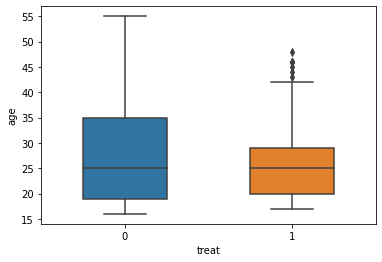

In [187]:
# See the effectiveness on treat & educ as an example
# We could see that the age difference significantly balanced compare to the initial boxplot
# But we still need to balance the races through matching for the "balanced" dataset
sns.boxplot(x='treat', y='age', data=df, width=0.5)

<AxesSubplot:xlabel='treat', ylabel='age'>

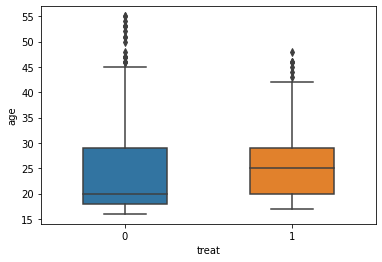

In [188]:
sns.boxplot(x='treat', y='age', data=df_balanced_1, width=0.5)

## 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


In [139]:
''' your code and explanations '''
# Similarly, now we add weighted edges to the graph for race features
G = nx.Graph()

for control_idx, control_row in control.iterrows():
    for treat_idx, treat_row in treat.iterrows():
        # We add a weighted edge only when the race info matches
        if (treat_row['black'] == control_row['black']) and (treat_row['hispan'] == control_row['hispan']):
            s = func_similarity(treat_row['propensity_score'], control_row['propensity_score'])
            G.add_weighted_edges_from([(control_idx, treat_idx, s)])
            
# Find the optimal matching pairs
matching_all = nx.max_weight_matching(G)

In [179]:
extracted_ids = []
for idx in range(len(list(matching_all))):
    (x, y) = list(matching_all)[idx]
    extracted_ids.extend((x, y))

df_balanced_all = df.iloc[extracted_ids]

## 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?

/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1296x864 with 0 Axes>

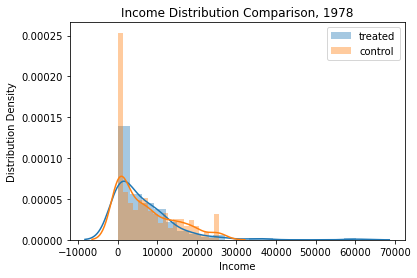

<Figure size 1296x864 with 0 Axes>

In [144]:
''' your code and explanations '''
# The original distribution plot
ax1 = sns.distplot(treat_group['re78'], bins=20, hist=True, kde=True, label='treated')
ax1 = sns.distplot(control_group['re78'], bins=20, hist=True, kde=True, label='control')
ax1.set_title('Income Distribution Comparison, 1978')
ax1.set(xlabel='Income', ylabel='Distribution Density')
plt.legend()
plt.figure(figsize = (18, 12))

/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/philipliu/anaconda3/envs/ada/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1296x864 with 0 Axes>

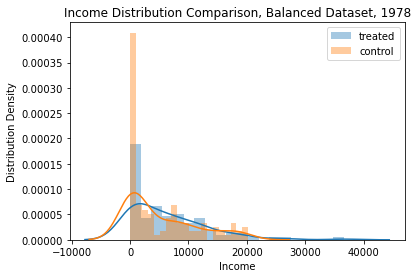

<Figure size 1296x864 with 0 Axes>

In [180]:
# The balanced dataset's distribution plot
treat_bl = df_balanced_all[df_balanced_all['treat'] == 1]
control_bl = df_balanced_all[df_balanced_all['treat'] == 0]

ax3 = sns.distplot(treat_bl['re78'], bins=20, hist=True, kde=True, label='treated')
ax3 = sns.distplot(control_bl['re78'], bins=20, hist=True, kde=True, label='control')
ax3.set_title('Income Distribution Comparison, Balanced Dataset, 1978')
ax3.set(xlabel='Income', ylabel='Distribution Density')
plt.legend()
plt.figure(figsize = (18, 12))

In [181]:
treat_bl['re78'].describe()

count      116.000000
mean      6375.738003
std       6670.986821
min          0.000000
25%        758.102600
50%       4648.736000
75%      10160.440000
max      36646.950000
Name: re78, dtype: float64

In [182]:
control_bl['re78'].describe()

count      116.000000
mean      5095.456025
std       6047.014862
min          0.000000
25%          0.000000
50%       2256.488500
75%       8942.092750
max      20243.380000
Name: re78, dtype: float64

After group balancing, the above less "naive" analysis shows that the training program is actually effective, since
people in the treated group (with training program) tend to have a more concentrated distribution on a higher income 
interval and the mean, upper quartile, lower quartile, and median income values are all higher than those in the control
group (without training program).